In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import uncertainties as u

In [2]:
#file locations
CALIBRATION_DIR = "Data\calibration_data_29_11_2\\"
SPECTRUM_DIR = "Data\spectrum_data_29_11_2\\"

#measurement info
N_MEASUREMENTS = 100
N_POINTS= 5000000

In [3]:
#Calculate the mean and standard deviations of both data sets

#calculating means
mean_spectrum_ch1_unscaled=np.zeros(N_POINTS)
mean_spectrum_ch2_unscaled=np.zeros(N_POINTS)
mean_calibration_ch1_unscaled=np.zeros(N_POINTS)
mean_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum values
for i in range(N_MEASUREMENTS):
    mean_spectrum_ch1_unscaled+=np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_spectrum_ch2_unscaled+=np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')
    mean_calibration_ch1_unscaled+=np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_calibration_ch2_unscaled+=np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')

#divide by number of values
mean_spectrum_ch1_unscaled=mean_spectrum_ch1_unscaled/N_MEASUREMENTS
mean_spectrum_ch2_unscaled=mean_spectrum_ch2_unscaled/N_MEASUREMENTS
mean_calibration_ch1_unscaled=mean_calibration_ch1_unscaled/N_MEASUREMENTS
mean_calibration_ch2_unscaled=mean_calibration_ch2_unscaled/N_MEASUREMENTS

#calculating standard deviations
std_spectrum_ch1_unscaled=np.zeros(N_POINTS)
std_spectrum_ch2_unscaled=np.zeros(N_POINTS)
std_calibration_ch1_unscaled=np.zeros(N_POINTS)
std_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum deviations squared
for i in range(N_MEASUREMENTS):
    std_spectrum_ch1_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_spectrum_ch1_unscaled)**2
    std_spectrum_ch2_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_spectrum_ch2_unscaled)**2
    std_calibration_ch1_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_calibration_ch1_unscaled)**2
    std_calibration_ch2_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_calibration_ch2_unscaled)**2

#divide by the degrees of freedom
std_spectrum_ch1_unscaled=np.sqrt(std_spectrum_ch1_unscaled/(N_MEASUREMENTS-1))
std_spectrum_ch2_unscaled=np.sqrt(std_spectrum_ch2_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch1_unscaled=np.sqrt(std_calibration_ch1_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch2_unscaled=np.sqrt(std_calibration_ch2_unscaled/(N_MEASUREMENTS-1))

In [4]:
#generate unscaled time data

spectrum_time_ch1_unscaled=np.arange(0,N_POINTS)
calibration_time_ch1_unscaled=np.arange(0,N_POINTS)
spectrum_time_ch2_unscaled=np.arange(0,N_POINTS)
calibration_time_ch2_unscaled=np.arange(0,N_POINTS)

In [5]:
#scaling paramiters

SPECTRUM_CH1_XZERO=0
SPECTRUM_CH1_XINCR=1
SPECTRUM_CH1_YZERO=0
SPECTRUM_CH1_YMULT=1

SPECTRUM_CH2_XZERO=0
SPECTRUM_CH2_XINCR=1
SPECTRUM_CH2_YZERO=0
SPECTRUM_CH2_YMULT=1

CALIBRATION_CH1_XZERO=0
CALIBRATION_CH1_XINCR=1
CALIBRATION_CH1_YZERO=0
CALIBRATION_CH1_YMULT=1

CALIBRATION_CH2_XZERO=0
CALIBRATION_CH2_XINCR=1
CALIBRATION_CH2_YZERO=0
CALIBRATION_CH2_YMULT=1

In [6]:
#scaling data
mean_spectrum_ch1=(SPECTRUM_CH1_YMULT*mean_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
mean_spectrum_ch2=(SPECTRUM_CH2_YMULT*mean_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

mean_calibration_ch1=(CALIBRATION_CH1_YMULT*mean_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
mean_calibration_ch2=(CALIBRATION_CH2_YMULT*mean_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

spectrum_time_ch1=(SPECTRUM_CH1_XINCR*spectrum_time_ch1_unscaled)+SPECTRUM_CH1_XZERO
spectrum_time_ch2=(SPECTRUM_CH1_XINCR*spectrum_time_ch2_unscaled)+SPECTRUM_CH2_XZERO

calibration_time_ch1=(CALIBRATION_CH1_XINCR*calibration_time_ch1_unscaled)+CALIBRATION_CH1_XZERO
calibration_time_ch2=(CALIBRATION_CH2_XINCR*calibration_time_ch2_unscaled)+CALIBRATION_CH2_XZERO

std_spectrum_ch1=(SPECTRUM_CH1_YMULT*std_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
std_spectrum_ch2=(SPECTRUM_CH2_YMULT*std_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

std_calibration_ch1=(CALIBRATION_CH1_YMULT*std_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
std_calibration_ch2=(CALIBRATION_CH2_YMULT*std_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

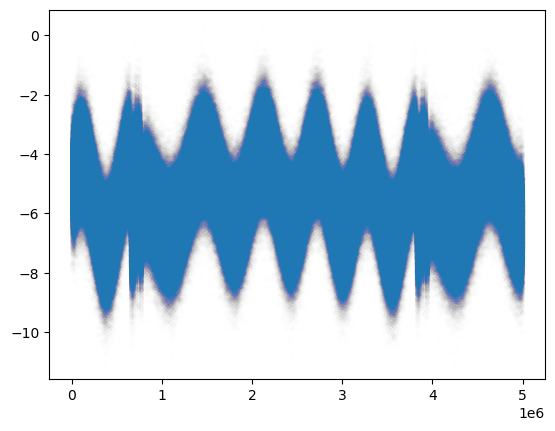

In [7]:
#plot all the data
plt.scatter(calibration_time_ch1,mean_calibration_ch1,marker='.',alpha=1/256)
plt.show()

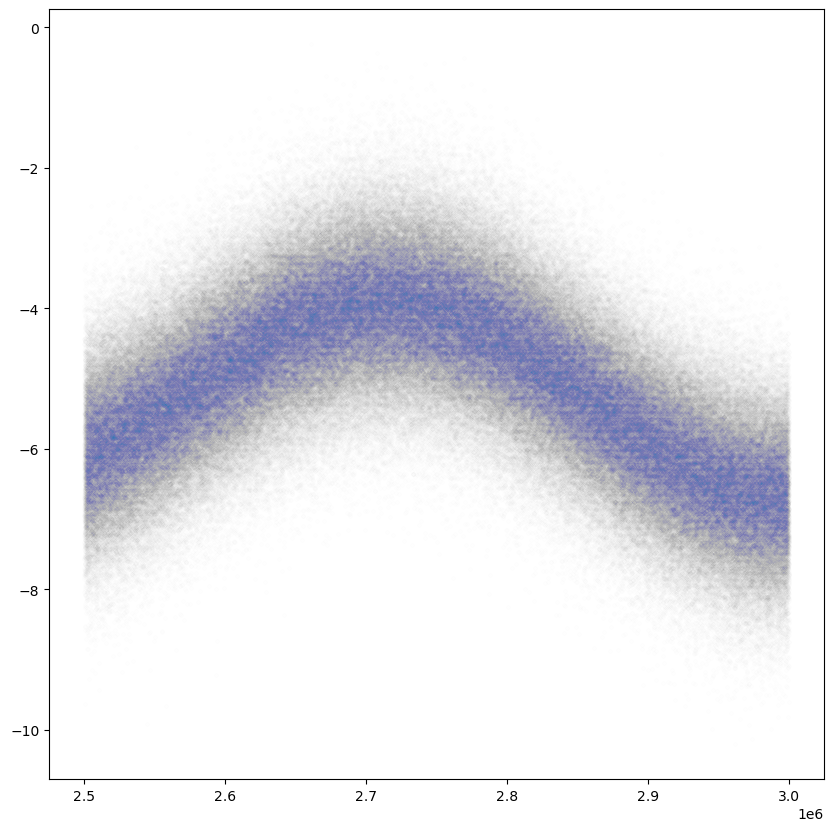

In [8]:
#plot zoomed in region and it looks actually quite good i think the above plot is "saturated"
plt.subplots(figsize=(10, 10))
plt.scatter(calibration_time_ch1[2500000:3000000],mean_calibration_ch1[2500000:3000000],marker='.',alpha=1/256)
plt.show()

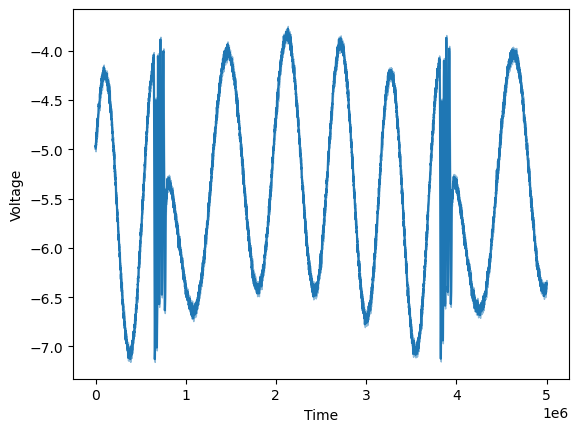

In [54]:
#work out averages by grouping

N_GROUPS=5000
group_step_ch1=N_POINTS//N_GROUPS
#group_step_ch2=(calibration_time_ch1.size)//N_GROUPS

mean_calibration_time_ch1=np.zeros(N_GROUPS)
#mean_times_ch2=np.zeros(N_GROUPS)
mean_mean_calibration_ch1=np.zeros(N_GROUPS)
err_mean_calibration_ch1=np.zeros(N_GROUPS)

w=1/(std_calibration_ch1/np.sqrt(N_MEASUREMENTS-1))**2
x=mean_calibration_ch1

for i in range(N_GROUPS):
    mean_calibration_time_ch1[i]=np.mean(np.array(calibration_time_ch1[i*group_step_ch1:(i+1)*group_step_ch1]))
    mean_mean_calibration_ch1[i]=np.sum(x[i*group_step_ch1:(i+1)*group_step_ch1]*w[i*group_step_ch1:(i+1)*group_step_ch1])/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1])
    err_mean_calibration_ch1[i]=np.sqrt(1/np.sum(w[i*group_step_ch1:(i+1)*group_step_ch1]))


#plt.errorbar(mean_times_ch2, mean_voltages_ch2,yerr=std_voltages_ch2,linestyle="",marker='.')
#plt.errorbar(mean_times_ch1, mean_voltages_ch1,yerr=std_voltages_ch1,linestyle="",marker='.')
plt.plot(mean_calibration_time_ch1,mean_mean_calibration_ch1)
plt.fill_between(
    x=mean_calibration_time_ch1,
    y1=mean_mean_calibration_ch1+err_mean_calibration_ch1,
    y2=mean_mean_calibration_ch1-err_mean_calibration_ch1,
    alpha=0.5,
    color='C0'
)

plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

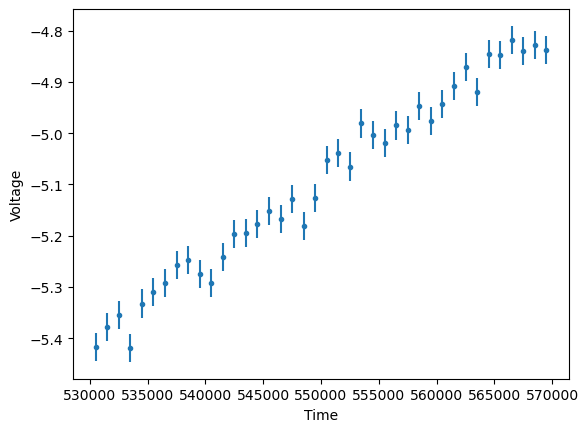

In [56]:
#zomed in error plot to see if the errors look apropriet and they look okay

plt.errorbar(x=mean_calibration_time_ch1[530:570],y=mean_mean_calibration_ch1[530:570],yerr=err_mean_calibration_ch1[530:570],linestyle="",marker='.')


plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

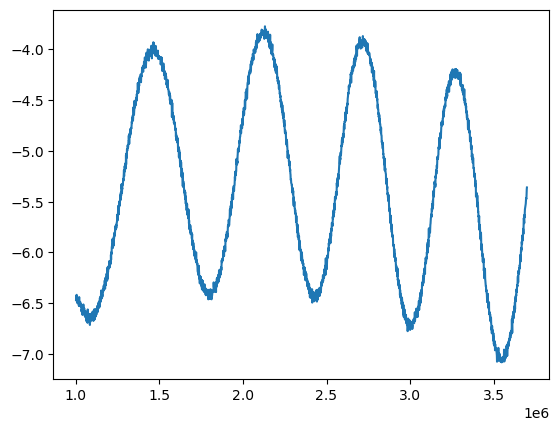

In [61]:
#now we are cropping the data
ct=mean_calibration_time_ch1[1000:3700]
cv=mean_mean_calibration_ch1[1000:3700]
ce=err_mean_calibration_ch1[1000:3700]

plt.plot(ct,cv)
plt.show()